In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
from my_lib.net import MultiLayerNet
from my_lib.optimizer import SGD

In [2]:
(x_train, y_train), (x_test, y_test) = load_mnist(normalize=True)
x_train = x_train[:300]
y_train = y_train[:300]

In [3]:
net = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)
max_epochs = 200
train_size = x_train.shape[0]
batch_size = 100

In [4]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 1

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    grads = net.gradient(x_batch, y_batch)
    optimizer.update(net.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = net.accuracy(x_train, y_train)
        test_acc = net.accuracy(x_test, y_test)
        print(f"epoch: {epoch_cnt}, train accuracy: {train_acc:.4f}, test accuracy: {test_acc:.4f}")
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        epoch_cnt += 1
        if epoch_cnt > max_epochs:
            break

epoch: 1, train accuracy: 0.1467, test accuracy: 0.1002
epoch: 2, train accuracy: 0.1267, test accuracy: 0.0921
epoch: 3, train accuracy: 0.1433, test accuracy: 0.0994
epoch: 4, train accuracy: 0.1667, test accuracy: 0.1053
epoch: 5, train accuracy: 0.1733, test accuracy: 0.1102
epoch: 6, train accuracy: 0.2100, test accuracy: 0.1218
epoch: 7, train accuracy: 0.2200, test accuracy: 0.1314
epoch: 8, train accuracy: 0.2100, test accuracy: 0.1403
epoch: 9, train accuracy: 0.2600, test accuracy: 0.1627
epoch: 10, train accuracy: 0.2833, test accuracy: 0.1792
epoch: 11, train accuracy: 0.2967, test accuracy: 0.2014
epoch: 12, train accuracy: 0.3100, test accuracy: 0.2086
epoch: 13, train accuracy: 0.3233, test accuracy: 0.2192
epoch: 14, train accuracy: 0.3300, test accuracy: 0.2319
epoch: 15, train accuracy: 0.3633, test accuracy: 0.2469
epoch: 16, train accuracy: 0.3867, test accuracy: 0.2705
epoch: 17, train accuracy: 0.4033, test accuracy: 0.2868
epoch: 18, train accuracy: 0.4100, test 

epoch: 145, train accuracy: 0.9967, test accuracy: 0.7416
epoch: 146, train accuracy: 0.9967, test accuracy: 0.7473
epoch: 147, train accuracy: 0.9967, test accuracy: 0.7462
epoch: 148, train accuracy: 0.9967, test accuracy: 0.7449
epoch: 149, train accuracy: 0.9967, test accuracy: 0.7448
epoch: 150, train accuracy: 0.9967, test accuracy: 0.7453
epoch: 151, train accuracy: 0.9967, test accuracy: 0.7453
epoch: 152, train accuracy: 0.9967, test accuracy: 0.7472
epoch: 153, train accuracy: 0.9967, test accuracy: 0.7461
epoch: 154, train accuracy: 0.9967, test accuracy: 0.7476
epoch: 155, train accuracy: 0.9967, test accuracy: 0.7476
epoch: 156, train accuracy: 0.9967, test accuracy: 0.7484
epoch: 157, train accuracy: 1.0000, test accuracy: 0.7507
epoch: 158, train accuracy: 1.0000, test accuracy: 0.7501
epoch: 159, train accuracy: 1.0000, test accuracy: 0.7479
epoch: 160, train accuracy: 0.9967, test accuracy: 0.7512
epoch: 161, train accuracy: 0.9967, test accuracy: 0.7479
epoch: 162, tr

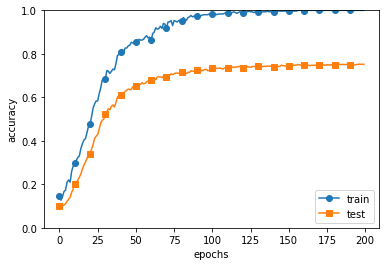

In [5]:
markers = {"train": "o", "test": "s"}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker="o", label="train", markevery=10)
plt.plot(x, test_acc_list, marker="s", label="test", markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.show()